In [2]:
import tda
from tda.client import Client
import httpx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import datetime
from datetime import timedelta



API_KEY = '0TSGZDINMI3LAFX5RRGI65GTXZ310SDF'
REDIRECT_URI = 'http://localhost/test'

## tda-generate-token.py --token_file 'key.txt' --api_key '0TSGZDINMI3LAFX5RRGI65GTXZ310SDF' --redirect_uri 'http://localhost/test'

# c = tda.auth.easy_client(API_KEY, REDIRECT_URI, 'key.txt')

# resp = c.get_price_history('AAPL',
#         period_type=Client.PriceHistory.PeriodType.YEAR,
#         period=Client.PriceHistory.Period.TWENTY_YEARS,
#         frequency_type=Client.PriceHistory.FrequencyType.DAILY,
#         frequency=Client.PriceHistory.Frequency.DAILY)
# assert resp.status_code == httpx.codes.OK
# history = resp.json()

In [3]:
df_2020 = pd.read_excel('SPX_2020.xlsx', names=['date', 'open', 'high', 'low', 'close', 'volume']).drop(columns='volume')
df_2021 = pd.read_excel('SPX_2021.xlsx', names=['date', 'open', 'high', 'low', 'close', 'volume']).drop(columns='volume')

/Users/kush/Documents/DS/env/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/kush/Documents/DS/env/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
df = pd.concat([df_2020,df_2021]).reset_index(drop=True).set_index('date')
df

,open,high,low,close
date,,,,
2020-01-01 18:01:00,3234.837,3234.837,3233.337,3233.337
2020-01-01 18:02:00,3233.337,3233.852,3233.334,3233.740
2020-01-01 18:03:00,3233.740,3234.600,3233.552,3234.346
2020-01-01 18:04:00,3234.346,3234.352,3233.852,3233.855
2020-01-01 18:05:00,3233.855,3234.100,3233.837,3233.900
...,...,...,...,...
2021-12-31 16:09:00,4770.399,4771.148,4770.145,4770.848
2021-12-31 16:10:00,4771.136,4771.154,4770.333,4770.836
2021-12-31 16:11:00,4770.651,4771.139,4770.136,4771.133


In [5]:
gap_up = np.where(df.low - df.shift(2).high > 0, 1, 0)
gap_down = np.where(df.shift(2).low - df.high > 0, 1, 0)

In [6]:
df['gap_up'] = gap_up
df['gap_down'] = gap_down
df['price_low'] = 0
df['price_high'] = 0

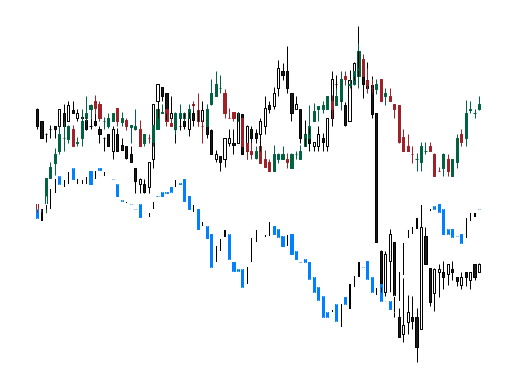

In [7]:
fig, ax = plt.subplots()
ax.axis('off')
mpf.plot(df[-100:], type='candle', ax=ax, style='classic')
mpf.plot(df[-200:-100], type='candle', ax=ax, style='charles')
mpf.plot(df[-300:-200], type='candle', ax=ax, style='mike')

In [22]:
# Dailv Chart - 12 months no less than 9 months view
# 2) 4 hour Chart - 3 months view
# 3) 60 minute Chart - 3 weeks view
# 4) 15 minute Chart - 3 to 4 davs view

def TimeRange(day, delta):
    delta_weekday = day - timedelta(days=delta)
    while delta_weekday.weekday() == 5 or delta_weekday.weekday() == 6:
        delta += 1
        delta_weekday = day - timedelta(days=delta)
    return day - timedelta(days=delta)
            

start = len(df)//2 
day = (df.iloc[start].name + timedelta(days=1)).replace(hour=9, minute=15)

d = df.resample('1D').agg({'open' : 'first', 'high' : 'max', 'low' : 'min', 'close' : 'last'})[TimeRange(day, 365):day][-360:]
h4 = df.resample('4H').agg({'open' : 'first', 'high' : 'max', 'low' : 'min', 'close' : 'last'})[TimeRange(day, 60):day]
h1 = df.resample('1H').agg({'open' : 'first', 'high' : 'max', 'low' : 'min', 'close' : 'last'})[TimeRange(day, 15):day]
m15 = df.resample('15T').agg({'open' : 'first', 'high' : 'max', 'low' : 'min', 'close' : 'last'})[TimeRange(day, 4):day][-360:]

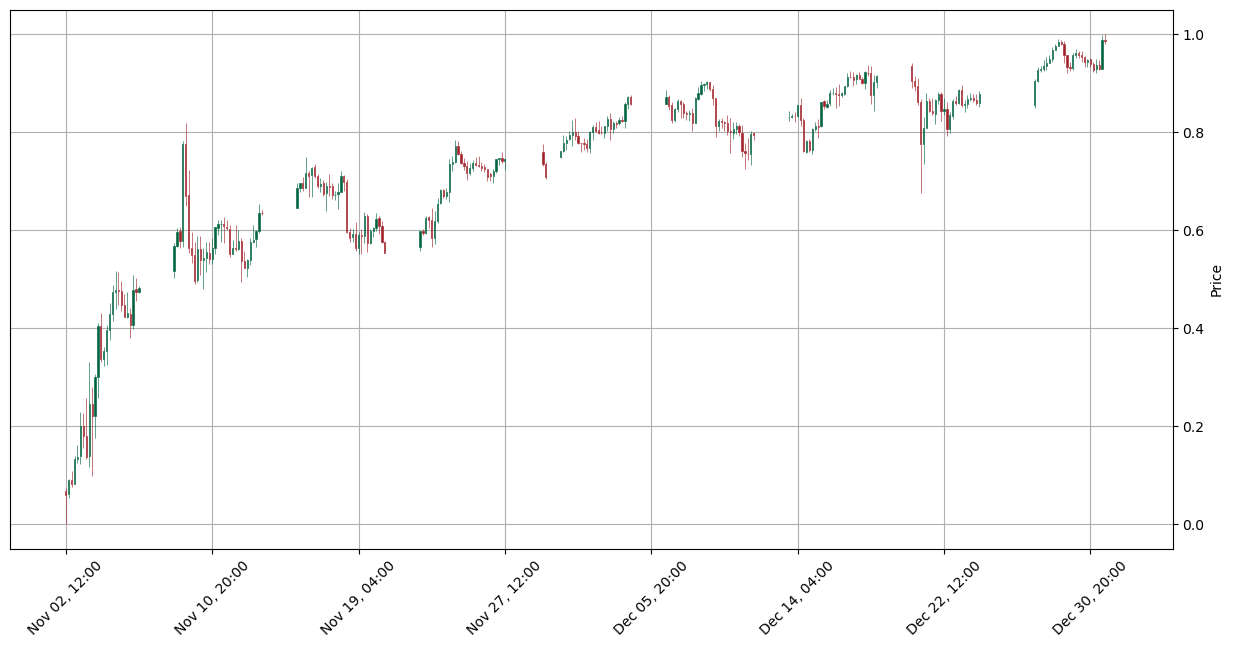

In [63]:
fig, ax = plt.subplots(figsize=(15,7))
ax.axis('on')
ax.grid('both')

#normalize then plot
def norm(dframe):
    return (dframe-np.nanmin(dframe.values))/(np.nanmax(dframe.values)-np.nanmin(dframe.values))

#mpf.plot(norm(d), type='candle', ax=ax, style='classic')
mpf.plot(norm(h4), type='candle', ax=ax, style='charles')
#mpf.plot(norm(h1), type='candle', ax=ax, style='mike')
#mpf.plot(norm(m15), type='candle', ax=ax, style='brasil')

In [10]:
# for idx, value in df.iterrows():
#     if value.gap_up:
#         df.loc[idx].price_low == df.loc[idx - 2].high
#         df.loc[idx].price_high == value.low
        
#     elif value.gap_down:
#         df.loc[idx].price_low == df.loc[idx - 2].low
#         df.loc[idx].price_high == value.high

In [43]:
h1[h1.isna().any(axis=1)]

,open,high,low,close
date,,,,
2020-12-17 17:00:00,NaN,NaN,NaN,NaN
2020-12-18 17:00:00,NaN,NaN,NaN,NaN
2020-12-18 18:00:00,NaN,NaN,NaN,NaN
2020-12-18 19:00:00,NaN,NaN,NaN,NaN
2020-12-18 20:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-01-01 05:00:00,NaN,NaN,NaN,NaN
2021-01-01 06:00:00,NaN,NaN,NaN,NaN
2021-01-01 07:00:00,NaN,NaN,NaN,NaN
